# # Decision Tree Classification for Iris Dataset
  
 1. Data preprocessing and exploration
 2. One-hot encoding of target variable
 3. Building a decision tree model
 4. Visualizing the decision tree
 5. Pruning the tree to prevent overfitting
 6. Model evaluation using various metrics and confusion matrix

### 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [3]:
# Set random seed for reproducibility
np.random.seed(42)


### 2. Load and Explore Data

In [5]:
# Load the dataset
iris_df = pd.read_csv('DecisionTree-iris.csv')

# Display the first few rows
print(iris_df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [6]:
# Check basic information
print("\nDataset info:")
print(iris_df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [7]:
# Summary statistics
print("\nSummary statistics:")
print(iris_df.describe())


Summary statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [8]:
# Check for missing values
print("\nMissing values:")
print(iris_df.isnull().sum())


Missing values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [9]:
# Count of each species
print("\nCount of each species:")
print(iris_df['species'].value_counts())


Count of each species:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


## 3. Exploratory Data Analysis

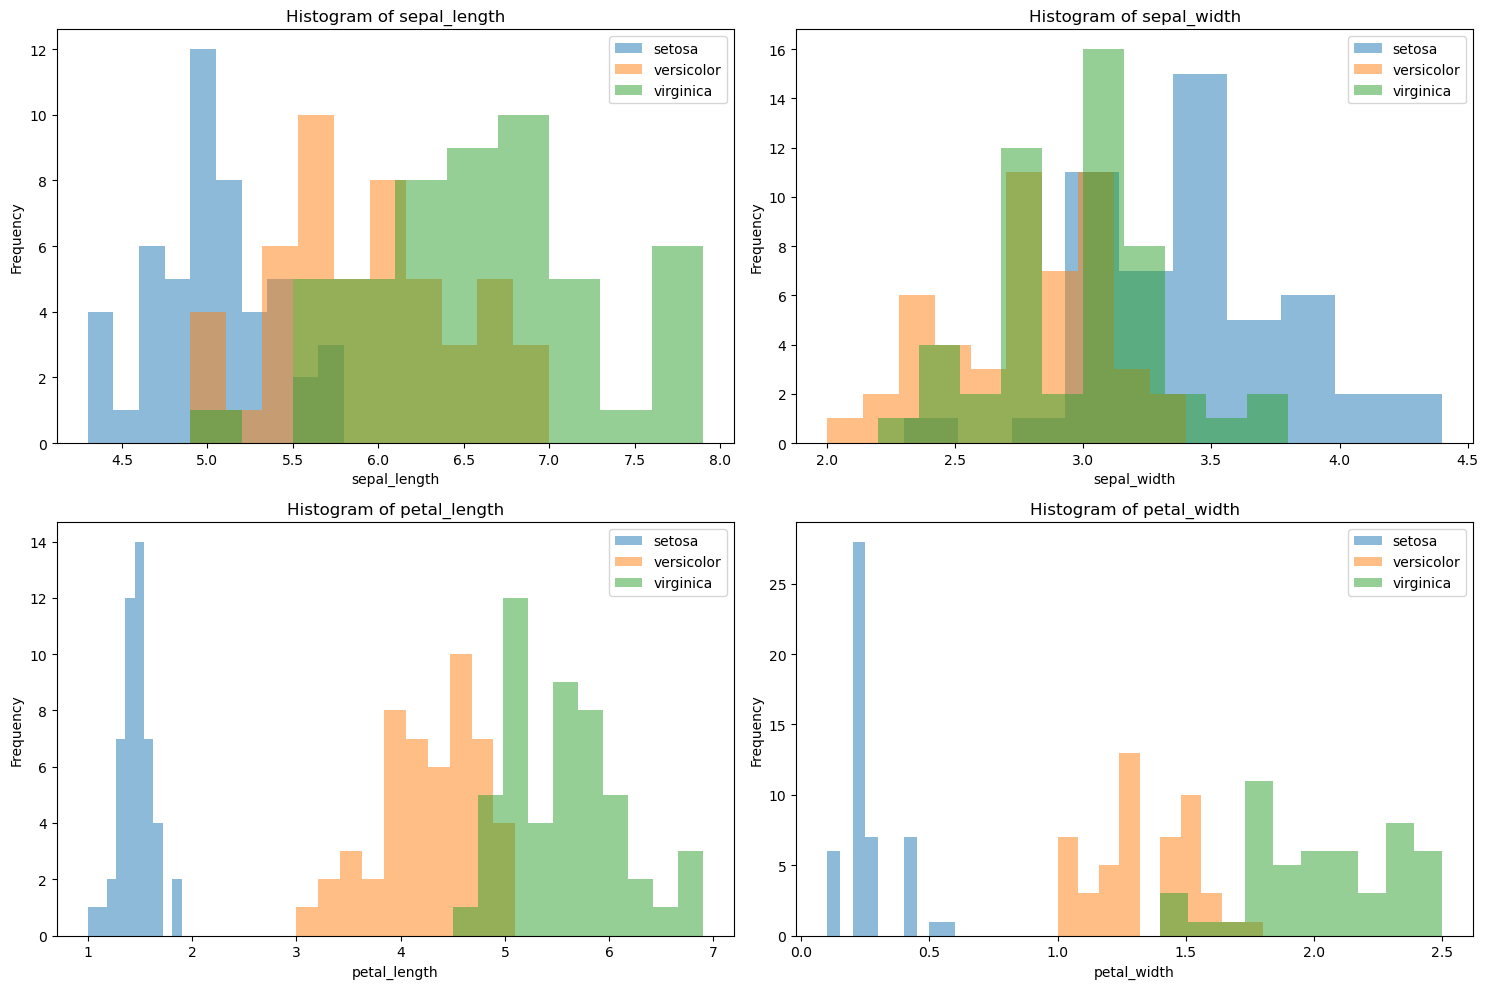

In [10]:
# Set up the figure
plt.figure(figsize=(15, 10))

# Plot histograms for each feature by species
for i, feature in enumerate(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']):
    plt.subplot(2, 2, i+1)
    for species in iris_df['species'].unique():
        subset = iris_df[iris_df['species'] == species]
        plt.hist(subset[feature], bins=10, alpha=0.5, label=species)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

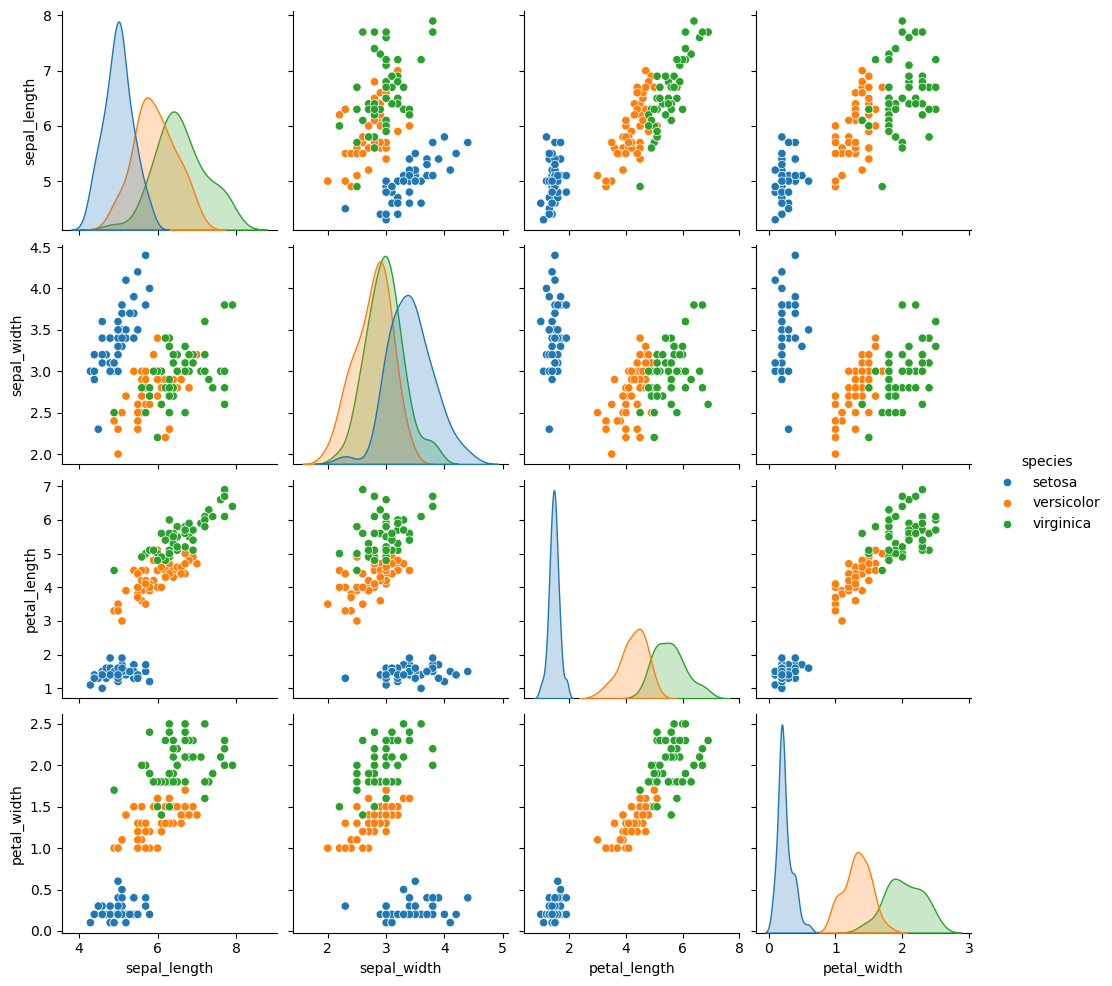

In [11]:
# Pairplot to visualize relationships between features
plt.figure(figsize=(10, 8))
sns.pairplot(iris_df, hue='species', height=2.5)
plt.show()

### Observations from the Plot:

- petal_length and petal_width clearly separate the species well.
- setosa is clearly distinct from versicolor and virginica in petal features.
- sepal_width is less helpful for classification (more overlap between species).

### Correlation Matrix

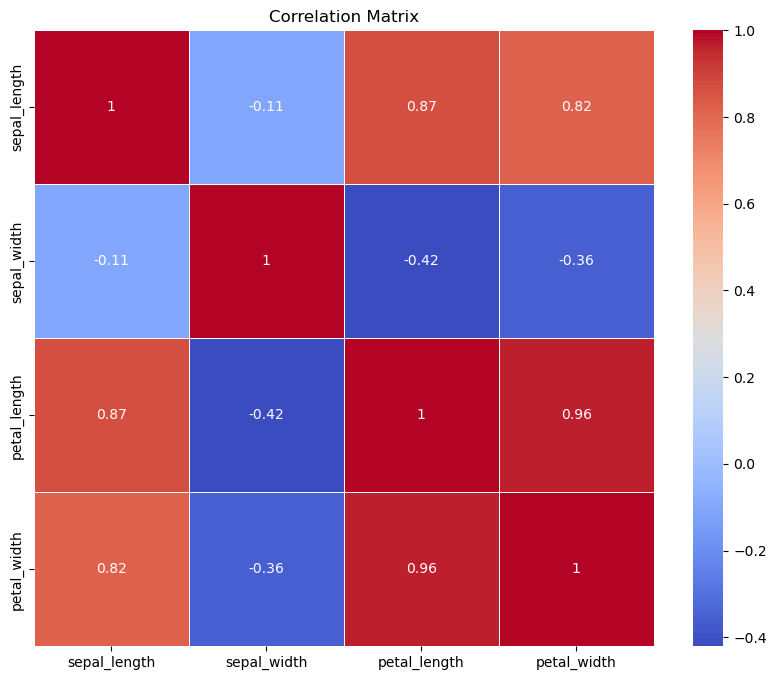

In [13]:
# Correlation matrix
# Drop non-numeric columns like 'species'
numeric_df = iris_df.drop(columns=['species'])

# Correlation matrix
plt.figure(figsize=(10, 8))
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### 4. Data Preprocessing

In [14]:
# Seperate features and target variable
X = iris_df.drop(columns=['species'], axis=1)
y = iris_df['species']

In [16]:
# One-hot encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # First convert to numerical labels
onehot_encoder = OneHotEncoder(sparse_output=False)
y_onehot = onehot_encoder.fit_transform(y_encoded.reshape(-1, 1))

In [17]:
# Display the encoding
species_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("\nSpecies mapping (Label Encoding):")
print(species_mapping)


Species mapping (Label Encoding):
{'setosa': 0, 'versicolor': 1, 'virginica': 2}


In [18]:
print("\nOne-hot encoding example:")
print(pd.DataFrame(y_onehot, columns=[f'species_{cls}' for cls in label_encoder.classes_]).head())


One-hot encoding example:
   species_setosa  species_versicolor  species_virginica
0             1.0                 0.0                0.0
1             1.0                 0.0                0.0
2             1.0                 0.0                0.0
3             1.0                 0.0                0.0
4             1.0                 0.0                0.0


In [19]:
# For the decision tree, we'll use the label encoded version
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

In [23]:
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 105 samples
Testing set size: 45 samples



### 5. Build and Train Decision Tree Classifier

In [24]:
# Initialize and train the model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [25]:
# Make predictions
y_pred = dt_classifier.predict(X_test)

In [26]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of unpruned decision tree: {accuracy:.4f}")


Accuracy of unpruned decision tree: 0.9333


### Visualize The Decision Tree

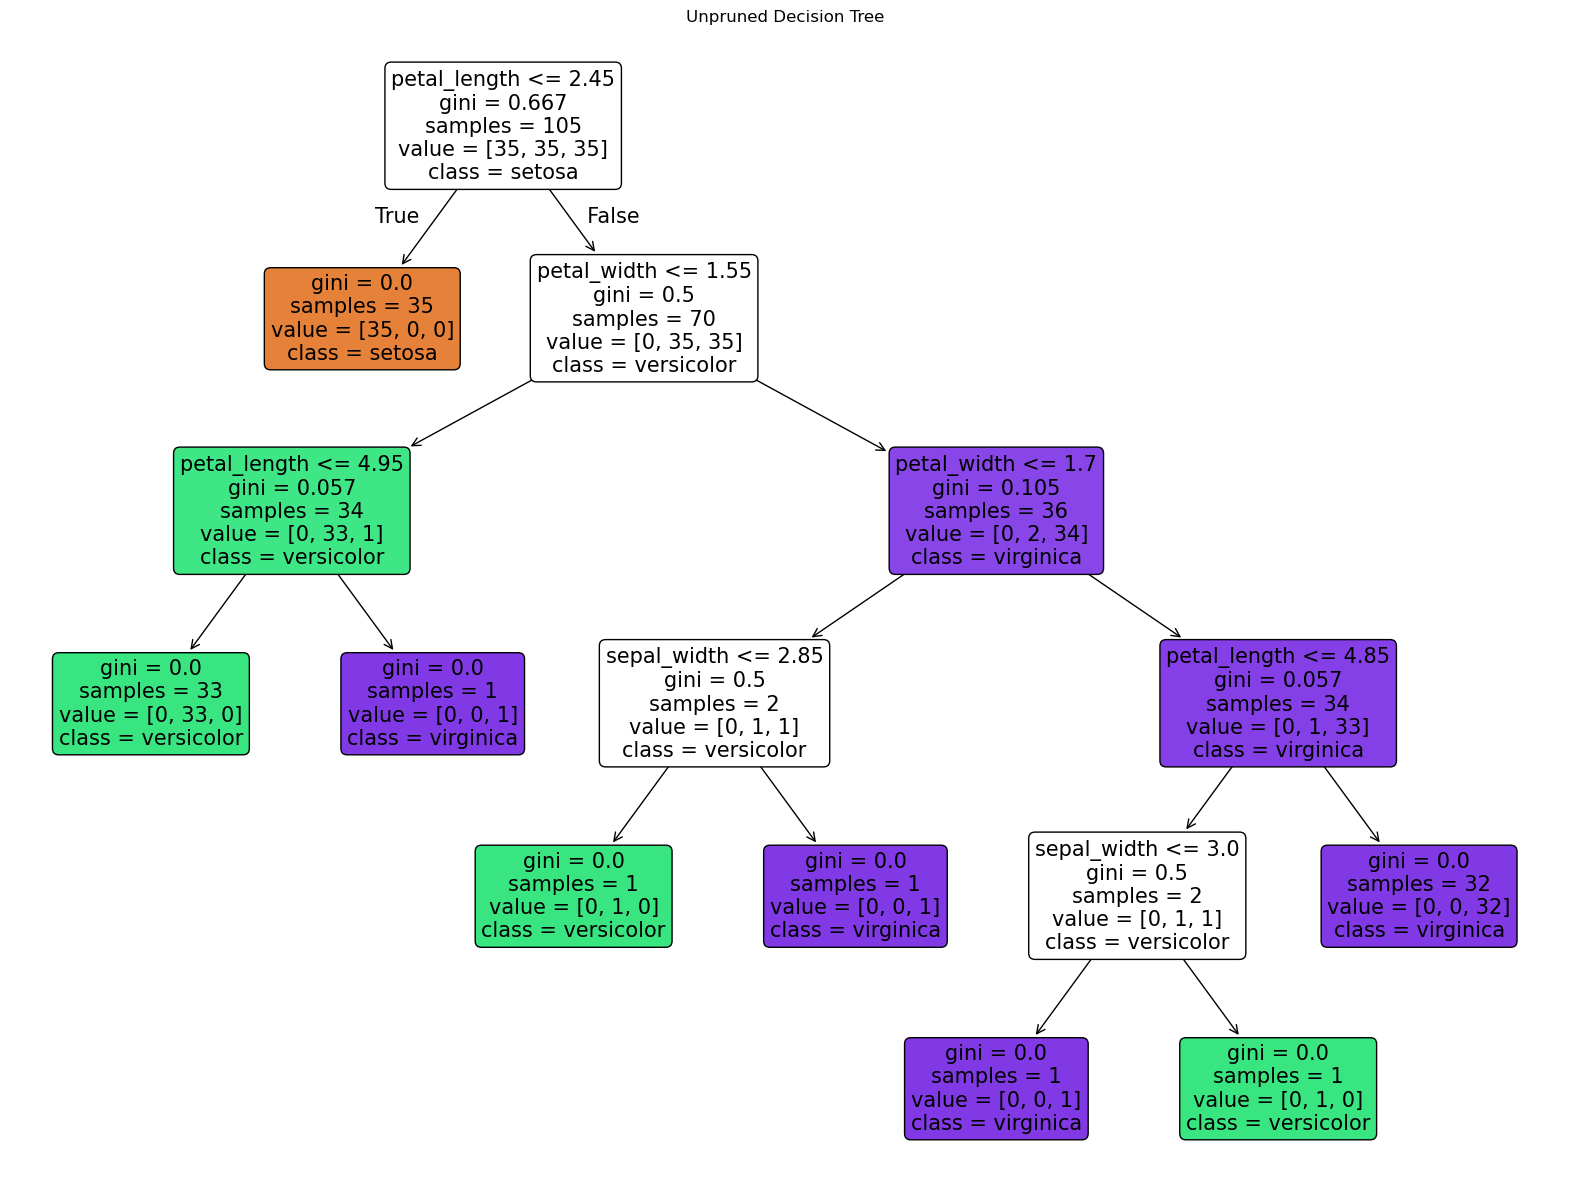

In [30]:
plt.figure(figsize=(20, 15))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, 
          class_names=label_encoder.classes_, rounded=True, fontsize=15)
plt.title('Unpruned Decision Tree')
plt.show()

In [31]:
# Print text representation of the tree
tree_text = export_text(dt_classifier, feature_names=list(X.columns))
print("Decision Tree Structure:")
print(tree_text)

Decision Tree Structure:
|--- petal_length <= 2.45
|   |--- class: 0
|--- petal_length >  2.45
|   |--- petal_width <= 1.55
|   |   |--- petal_length <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal_length >  4.95
|   |   |   |--- class: 2
|   |--- petal_width >  1.55
|   |   |--- petal_width <= 1.70
|   |   |   |--- sepal_width <= 2.85
|   |   |   |   |--- class: 1
|   |   |   |--- sepal_width >  2.85
|   |   |   |   |--- class: 2
|   |   |--- petal_width >  1.70
|   |   |   |--- petal_length <= 4.85
|   |   |   |   |--- sepal_width <= 3.00
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- sepal_width >  3.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- petal_length >  4.85
|   |   |   |   |--- class: 2



### 7. Evaluate the Unpruned Model

In [32]:
# Classification report
print("\nClassification Report (Unpruned Tree):")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Classification Report (Unpruned Tree):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.80      0.89        15
   virginica       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



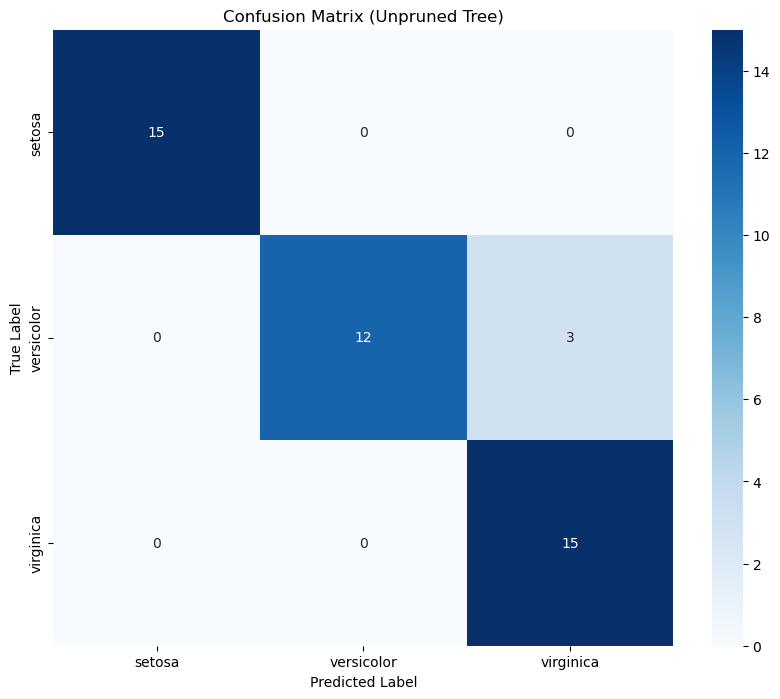

In [33]:
# Confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix (Unpruned Tree)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [34]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_classifier.feature_importances_
}).sort_values('Importance', ascending=False)

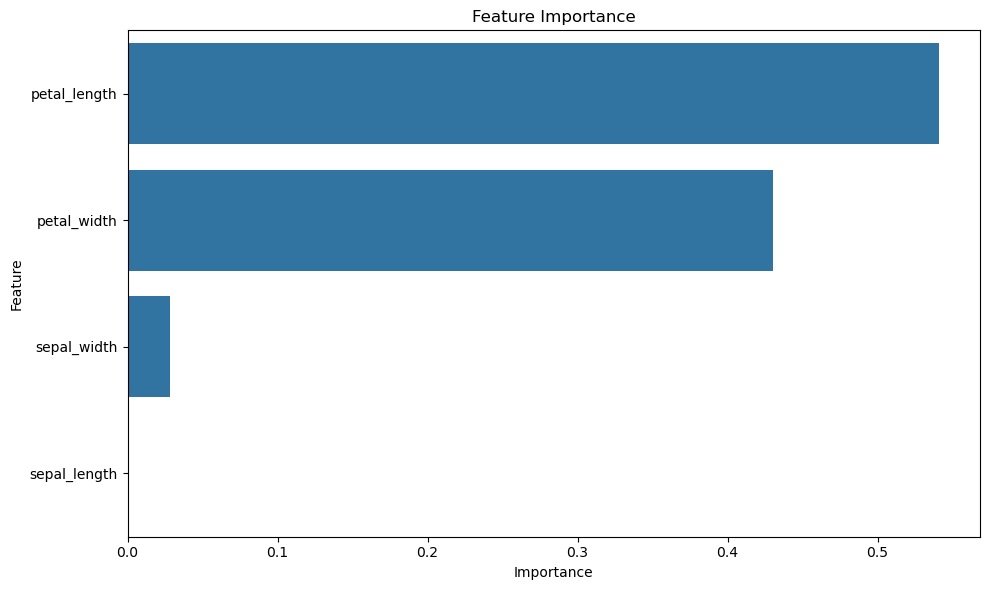

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [36]:
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
        Feature  Importance
2  petal_length    0.541176
3   petal_width    0.430252
1   sepal_width    0.028571
0  sepal_length    0.000000



### 8. Prune the Decision Tree

In [37]:
# Perform grid search for optimal pruning parameters
param_grid = {
    'max_depth': [3, 4, 5, 6, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [38]:
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0
)

In [39]:
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("\nBest hyperparameters found:")
print(best_params)


Best hyperparameters found:
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [40]:
# Train a new decision tree with the best parameters
pruned_dt = DecisionTreeClassifier(random_state=42, **best_params)
pruned_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [41]:
# Make predictions with the pruned model
y_pruned_pred = pruned_dt.predict(X_test)

# Calculate accuracy for the pruned model
pruned_accuracy = accuracy_score(y_test, y_pruned_pred)
print(f"\nAccuracy of pruned decision tree: {pruned_accuracy:.4f}")


Accuracy of pruned decision tree: 0.9778


### Visualize the Pruned Decision Tree

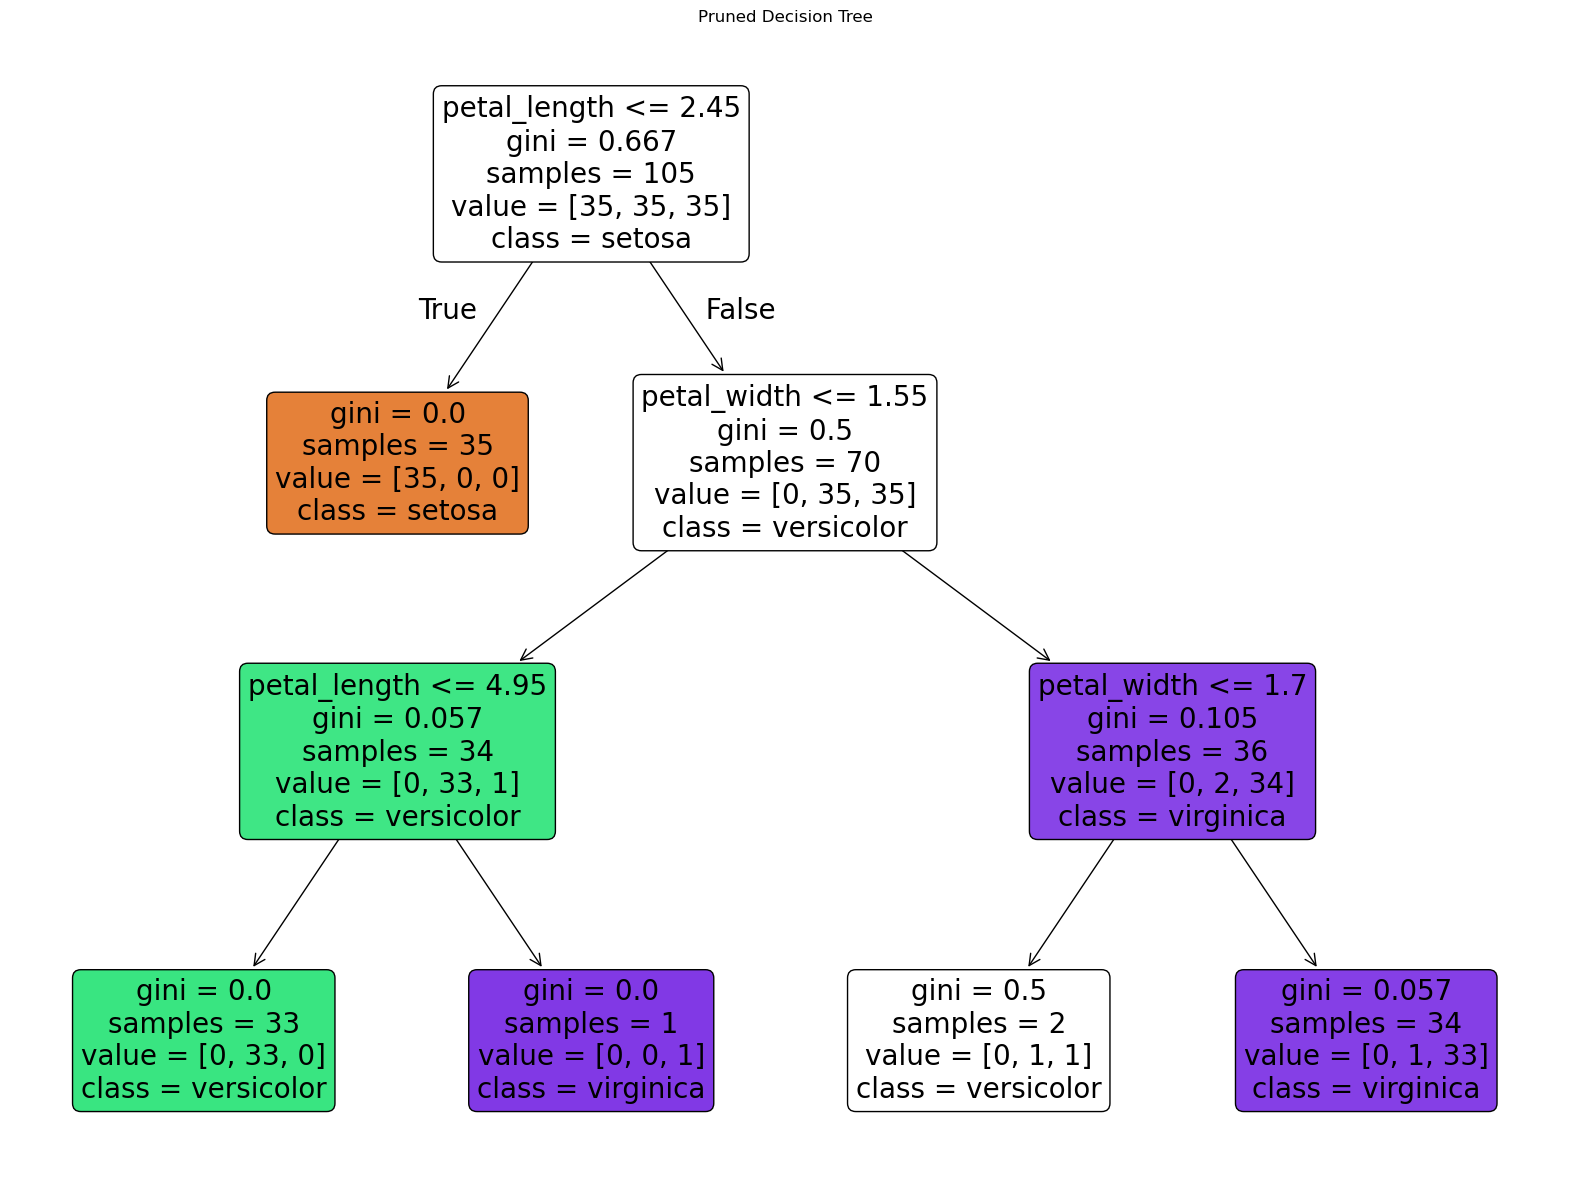

In [47]:
plt.figure(figsize=(20, 15))
plot_tree(pruned_dt, filled=True, feature_names=X.columns, 
          class_names=label_encoder.classes_, rounded=True, fontsize=20)
plt.title('Pruned Decision Tree')
plt.show()

### 10. Evaluate the Pruned Model


Classification Report (Pruned Tree):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



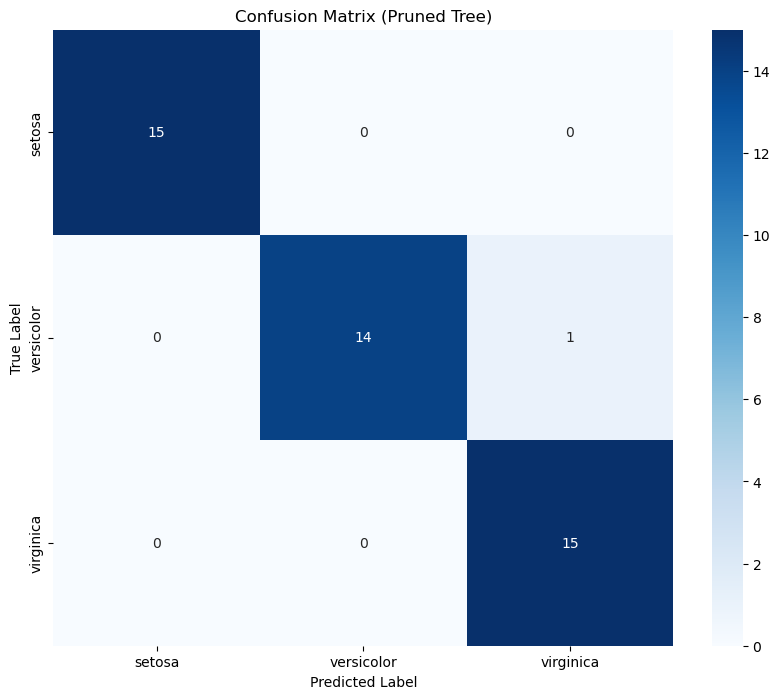

In [48]:
# Classification report for pruned model
print("\nClassification Report (Pruned Tree):")
print(classification_report(y_test, y_pruned_pred, target_names=label_encoder.classes_))

# Confusion matrix for pruned model
plt.figure(figsize=(10, 8))
cm_pruned = confusion_matrix(y_test, y_pruned_pred)
sns.heatmap(cm_pruned, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix (Pruned Tree)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

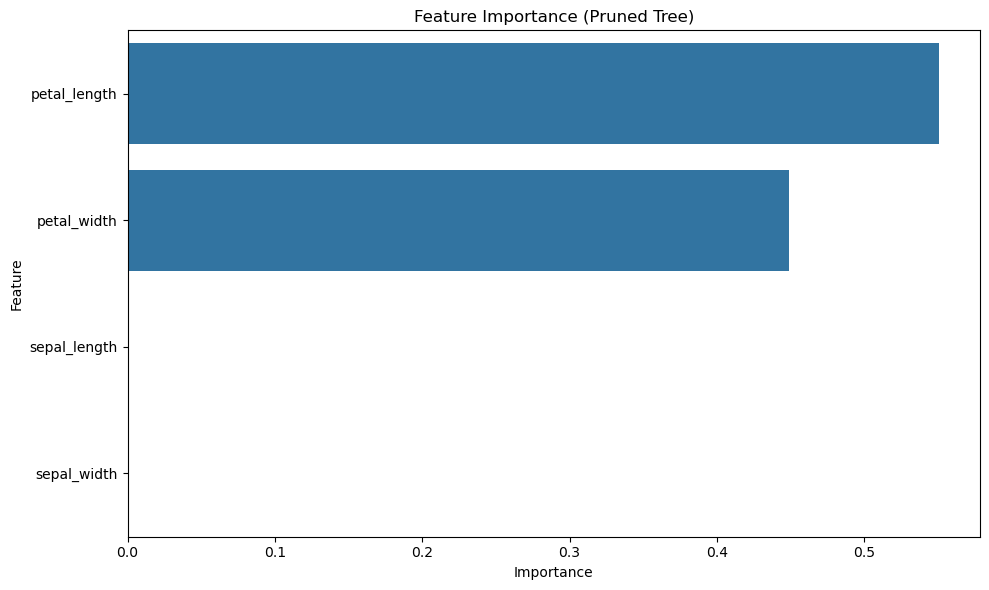


Feature Importance (Pruned Tree):
        Feature  Importance
2  petal_length    0.550877
3   petal_width    0.449123
0  sepal_length    0.000000
1   sepal_width    0.000000


In [50]:
# Feature importance for pruned model
pruned_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': pruned_dt.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=pruned_feature_importance)
plt.title('Feature Importance (Pruned Tree)')
plt.tight_layout()
plt.show()

print("\nFeature Importance (Pruned Tree):")
print(pruned_feature_importance)

### 11. Compare Unpruned vs Pruned Models

In [51]:
# Compare metrics
print("\nModel Comparison:")
print(f"Unpruned Tree Accuracy: {accuracy:.4f}")
print(f"Pruned Tree Accuracy: {pruned_accuracy:.4f}")

print(f"\nUnpruned Tree F1-Score (weighted): {f1_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Pruned Tree F1-Score (weighted): {f1_score(y_test, y_pruned_pred, average='weighted'):.4f}")


Model Comparison:
Unpruned Tree Accuracy: 0.9333
Pruned Tree Accuracy: 0.9778

Unpruned Tree F1-Score (weighted): 0.9327
Pruned Tree F1-Score (weighted): 0.9778


In [59]:
def plot_decision_boundaries(model, X, y, feature_indices=[0, 1], model_name=""):
    # Extract the two features for plotting
    X_plot = X.iloc[:, feature_indices].values
    
    # Create a mesh grid
    x_min, x_max = X_plot[:, 0].min() - 0.5, X_plot[:, 0].max() + 0.5
    y_min, y_max = X_plot[:, 1].min() - 0.5, X_plot[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                        np.arange(y_min, y_max, 0.01))
    
    # Create a reduced feature classifier using only the selected features
    reduced_classifier = DecisionTreeClassifier(random_state=42)
    if "max_depth" in model.get_params():
        # If the model has any specific parameters, try to match them
        reduced_classifier.set_params(**{
            param: value for param, value in model.get_params().items() 
            if param in reduced_classifier.get_params()
        })
    
    # Train on just the two selected features
    reduced_classifier.fit(X.iloc[:, feature_indices], y)
    
    # Make predictions on the mesh grid using the reduced classifier
    Z = reduced_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.figure(figsize=(12, 8))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
    
    # Plot the scatter points
    scatter = plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y, alpha=0.8, edgecolor='k', cmap='viridis')
    plt.xlabel(X.columns[feature_indices[0]])
    plt.ylabel(X.columns[feature_indices[1]])
    plt.title(f'Decision Boundary - {model_name} (Using {X.columns[feature_indices[0]]} and {X.columns[feature_indices[1]]})')
    plt.colorbar(scatter)
    plt.tight_layout()
    plt.show()


Visualizing decision boundaries using the two most important features:
Features: ['petal_length' 'petal_width']


d:\ProgramData\anaconda3\envs\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


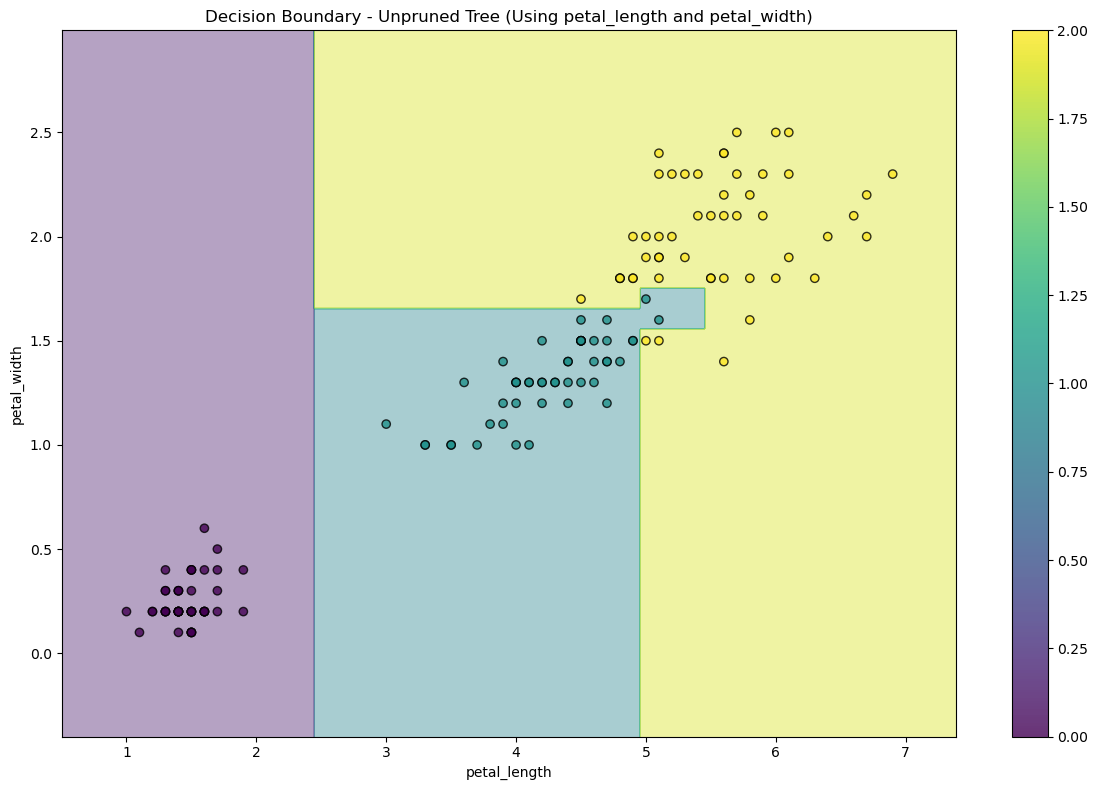

d:\ProgramData\anaconda3\envs\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


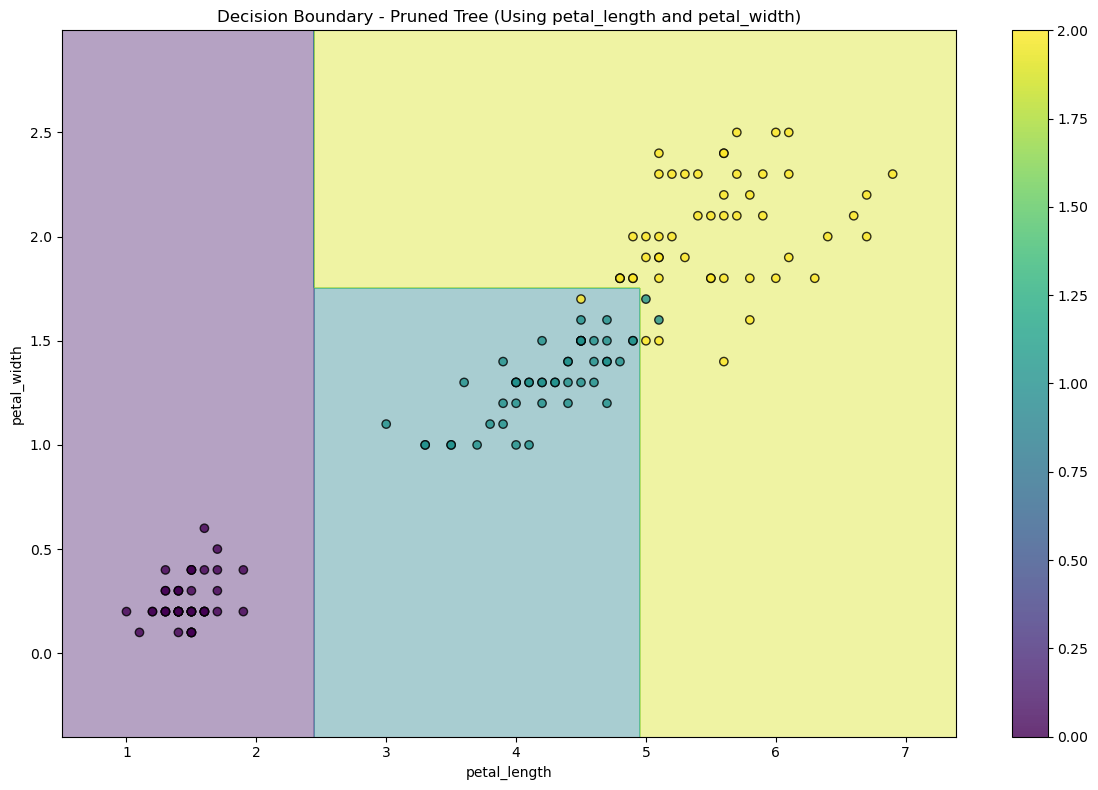

In [60]:

# Visualize decision boundaries for two important features
important_features = feature_importance['Feature'].values[:2]
feature_indices = [list(X.columns).index(feature) for feature in important_features]

print("\nVisualizing decision boundaries using the two most important features:")
print(f"Features: {important_features}")

# For unpruned tree
plot_decision_boundaries(dt_classifier, X, y_encoded, feature_indices=feature_indices, model_name="Unpruned Tree")

# For pruned tree
plot_decision_boundaries(pruned_dt, X, y_encoded, feature_indices=feature_indices, model_name="Pruned Tree")

### Conclusion

In [61]:
print("""
# Conclusion

We successfully built and compared decision tree models for classifying iris flowers:

1. Data exploration revealed clear patterns in the iris dataset, particularly in petal measurements.
2. We built an initial unpruned decision tree model that achieved high accuracy.
3. We then used grid search to find optimal parameters for pruning the tree.
4. The pruned tree model maintained high accuracy while reducing complexity.
5. Both models show excellent performance in classifying iris species.

The pruning process helped prevent overfitting while maintaining good predictive performance.
Key features for classification were petal length and petal width, which aligns with botanical knowledge.
""")

# Save the models
import joblib
joblib.dump(dt_classifier, 'unpruned_iris_decision_tree.pkl')
joblib.dump(pruned_dt, 'pruned_iris_decision_tree.pkl')

print("Models saved as 'unpruned_iris_decision_tree.pkl' and 'pruned_iris_decision_tree.pkl'")


# Conclusion

We successfully built and compared decision tree models for classifying iris flowers:

1. Data exploration revealed clear patterns in the iris dataset, particularly in petal measurements.
2. We built an initial unpruned decision tree model that achieved high accuracy.
3. We then used grid search to find optimal parameters for pruning the tree.
4. The pruned tree model maintained high accuracy while reducing complexity.
5. Both models show excellent performance in classifying iris species.

The pruning process helped prevent overfitting while maintaining good predictive performance.
Key features for classification were petal length and petal width, which aligns with botanical knowledge.

Models saved as 'unpruned_iris_decision_tree.pkl' and 'pruned_iris_decision_tree.pkl'
